In [3]:
import subprocess
import re

proc = subprocess.Popen(['powershell', 'Get-WmiObject win32_desktopmonitor;'], stdout=subprocess.PIPE)
res = proc.communicate()
monitors = re.findall('(?s)\r\nName\s+:\s(.*?)\r\n', res[0].decode("utf-8"))
print(monitors)

['Generic PnP Monitor']


-----------------------
----------------------
BCI EXPERIEMENT
-----------------------
- EEG data quality and visualisation 
- AUDIO:
    - Initial Test 
    - EEG visualisation
    - trial 1, trial 2
- VIBRO:
    - Initial Test 
    - EEG visualisation
    - trial 1, trial 2
- SHAPE: 
    - Initial Test 
    - EEG visualisation
    - trial 1, trial 2


In [1]:
# #pwd
# #--
# # import os
# # os.chdir('C:\\Users\\matil\\Desktop\\FYP\\code_env\\eeg-notebooks\\FYP') 
# import sys
# sys.path.append("..\\")
# sys.path.append("C:\\Users\\matil\\Desktop\\FYP\\code_env\\eeg-notebooks\\FYP\\utils")
# sys.path.append("C:\\Users\\matil\\Desktop\\FYP\\code_env\\eeg-notebooks\\FYP\\experiments")
# print(sys.path)

'c:\\Users\\matil\\Desktop\\FYP\\code_env\\eeg-notebooks\\FYP\\experiments'

In [4]:
import os
import experiment_lib 
import basic_analysis_lib as data
import time

#TODO EVERY TIME
subject_id = "17"
record_duration = 60*7

print("BEGINNING OF EXPERIMENT FOR SUBJECT NUMBER", subject_id)

BEGINNING OF EXPERIMENT FOR SUBJECT NUMBER 17


In [3]:
# -------------- EEG visualisation and data quality check

# good: EEG quality (signal-to-noise ratio): [ 0.16827877  0.19154625  0.09322894  0.17048355 41.15032666]
# noise in TP9: EEG quality (signal-to-noise ratio): [ 0.69171177  0.12949748  0.17856085  0.28869263 98.07525926]

data.check_quality()

Looking for an EEG stream...
Start acquiring data at time  1693838877.236002
Creating RawArray with float64 data, n_channels=5, n_times=172081
    Range : 0 ... 172080 =      0.000 ...   672.188 secs
Ready.


<string>:4: FutureWarning: NOTE: psd_multitaper() is a deprecated function. Function ``psd_multitaper()`` is deprecated; for Raw/Epochs/Evoked instances use ``spectrum = instance.compute_psd(method="multitaper")`` instead, followed by ``spectrum.get_data(return_freqs=True)``.
c:\Users\matil\Desktop\FYP\code_env\eeg-notebooks\FYP\experiments\basic_analysis_lib.py:141: RuntimeWarning: Could not properly use low_bias, keeping lowest-bias taper
  psds, freqs = mne.time_frequency.psd_multitaper(raw, fmax=30, n_jobs=1, verbose=0)


EEG quality (signal-to-noise ratio): [0.26254087 0.22191572 0.28416902 0.44061041 0.46422838]


-------------------
*AUDIO EXPERIMENT*
-------------------

In [5]:
# ----------------------- CHECK EEG 
#
# COMMAND: 
 muselsl view --version 2
data.check_quality()

Looking for an EEG stream...
Start acquiring data at time  1693838407.8467731
Creating RawArray with float64 data, n_channels=5, n_times=2389
    Range : 0 ... 2388 =      0.000 ...     9.328 secs
Ready.
EEG quality (signal-to-noise ratio): [ 0.1210584   0.194331    0.03850226  0.22281707 20.18839809]


Experiment Started at time  1693992432.277262
Looking for an EEG stream...
Start writing data at time  1693992432.2782776
Start acquiring data at time  1693992432.7810974
right
arrow
right
arrow
left
arrow
Stopped writing data at time  1693992452.7512228
Stopped acquiring data at time  1693992457.7885056
Number of blue circles reported is:  3 Number of actual blue circles is:  3
Experiment Completed at time  1693992462.2700555
1644.5163 	WARNING 	User requested fullscreen with size [1600  900], but screen is actually [1536, 864]. Using actual size
All events recorderd
 -> New merged file at  C:\Users\matil\Desktop\FYP\code_env\eeg-notebooks\FYP\data\test\data_muse_synch.csv


Loading these files: 

C:\Users\matil\Desktop\FYP\code_env\eeg-notebooks\FYP\data\test\data_muse_raw.csv




['TP9', 'AF7', 'AF8', 'TP10', 'stim']
['TP9', 'AF7', 'AF8', 'TP10', 'stim']
Creating RawArray with float64 data, n_channels=5, n_times=6229
    Range : 0 ... 6228 =      0.000 ...    24.328 secs
Ready.
Filt

c:\Users\matil\miniconda3\envs\eeg-notebooks\lib\site-packages\mne\viz\utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


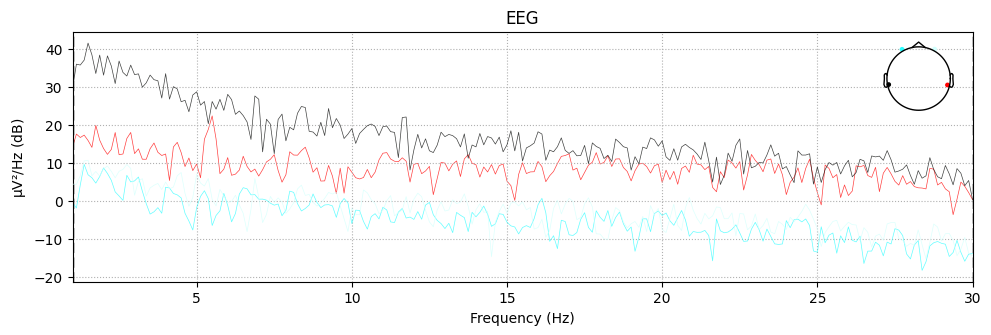

In [8]:
# ------------------------ Initial Test 

type = "audio"
duration = 20
file_name_raw = "C:\\Users\\matil\\Desktop\\FYP\\code_env\\eeg-notebooks\\FYP\\data\\test\\data_muse_raw.csv"
file_name_marked = "C:\\Users\\matil\\Desktop\\FYP\\code_env\\eeg-notebooks\\FYP\\data\\test\\data_muse_marked.csv"
file_name_synched ="C:\\Users\\matil\\Desktop\\FYP\\code_env\\eeg-notebooks\\FYP\\data\\test\\data_muse_synch.csv"

experiment_lib.run_trial(type, duration, file_name_raw = file_name_raw, file_name_marked = file_name_marked, file_name_synched =file_name_synched)
raw = data.load_csv_as_raw([file_name_raw ],256, [1,2,3, 4])
raw.filter(1,30, method='iir')
raw.plot_psd(fmin=1, fmax=30)

In [9]:
# -----------------------------TRIAL 1

type = "AudioVisual"

session_n = "1"

data_path = os.path.join(os.path.expanduser('~/'),'Desktop', 'FYP', 'code_env', 'eeg-notebooks','FYP', 'data', type, subject_id, session_n)
file_name_raw = os.path.join(data_path, 'eeg.csv') 
file_name_marked = os.path.join(data_path, 'markers.csv')
file_name_synched = os.path.join(data_path, 'synched_data.csv')


experiment_lib.run_trial(type= "audio", duration = record_duration, file_name_raw = file_name_raw, file_name_marked = file_name_marked, file_name_synched = file_name_synched)



Experiment Started at time  1693992484.9449055
Looking for an EEG stream...
Start writing data at time  1693992484.9471772
Start acquiring data at time  1693992485.4491282
right
arrow
right
arrow
right
arrow
left
arrow
left
arrow
right
arrow
left
arrow
right
arrow
right
arrow
left
arrow
right
arrow
right
arrow
right
arrow
left
arrow
left
arrow
left
arrow
right
arrow
right
arrow
right
arrow
right
arrow
right
arrow
right
arrow
right
arrow
left
arrow
right
arrow
right
arrow
right
arrow
left
arrow
right
arrow
left
arrow
right
arrow
left
arrow
left
arrow
left
arrow
right
arrow
left
arrow
right
arrow
right
arrow
right
arrow
left
arrow
left
arrow
right
arrow
left
arrow
right
arrow
left
arrow
right
arrow
right
arrow
left
arrow
left
arrow
left
arrow
right
arrow
left
arrow
left
arrow
left
arrow
right
arrow
left
arrow
right
arrow
right
arrow
right
arrow
left
arrow
right
arrow
left
arrow
right
arrow
right
arrow
right
arrow
left
arrow
right
arrow
right
arrow
left
arrow
left
arrow
Stopped writing da

In [10]:
# -----------------------------TRIAL 2

type = "AudioVisual"

session_n = "2"

data_path = os.path.join(os.path.expanduser('~/'),'Desktop', 'FYP', 'code_env', 'eeg-notebooks','FYP', 'data', type, subject_id, session_n)
file_name_raw = os.path.join(data_path, 'eeg.csv')
file_name_marked = os.path.join(data_path, 'markers.csv')
file_name_synched = os.path.join(data_path, 'synched_data.csv')


experiment_lib.run_trial(type= "audio", duration = record_duration, file_name_raw = file_name_raw, file_name_marked = file_name_marked, file_name_synched = file_name_synched)


Experiment Started at time  1693992957.5762713
Looking for an EEG stream...
Start writing data at time  1693992957.578271
Start acquiring data at time  1693992958.0800488
left
arrow
right
arrow
left
arrow
left
arrow
left
arrow
right
arrow
right
arrow
left
arrow
left
arrow
right
arrow
left
arrow
right
arrow
left
arrow
right
arrow
right
arrow
right
arrow
right
arrow
right
arrow
right
arrow
right
arrow
left
arrow
right
arrow
right
arrow
right
arrow
left
arrow
left
arrow
right
arrow
right
arrow
right
arrow
right
arrow
right
arrow
right
arrow
right
arrow
left
arrow
right
arrow
left
arrow
left
arrow
left
arrow
right
arrow
left
arrow
right
arrow
left
arrow
left
arrow
left
arrow
left
arrow
right
arrow
right
arrow
left
arrow
right
arrow
left
arrow
right
arrow
right
arrow
left
arrow
left
arrow
left
arrow
right
arrow
right
arrow
left
arrow
right
arrow
right
arrow
left
arrow
left
arrow
left
arrow
left
arrow
left
arrow
right
arrow
right
arrow
left
arrow
left
arrow
left
arrow
right
arrow
left
arrow


------------------
*VIBRO EXPERIMENT*
--------------------

In [ ]:
# ----------------------- CHECK EEG 

# COMMAND: muselsl view --version 2

data.check_quality()

In [ ]:
# -------------------------- check direction
# python C:\Users\matil\Desktop\FYP\code_env\eeg-notebooks\FYP\experiments\vibro_visualoddball\old\vibrate_serialpin.py

Experiment Started at time  1693991294.5620012
Looking for an EEG stream...
Start writing data at time  1693991294.5640013
Start acquiring data at time  1693991295.066783
Vibrate  left
left
arrow
Stopped writing data at time  1693991315.1585047
Stopped acquiring data at time  1693991320.087484
Number of blue circles reported is:  5 Number of actual blue circles is:  5
Experiment Completed at time  1693991324.6101065
506.3192 	WARNING 	User requested fullscreen with size [1600  900], but screen is actually [1536, 864]. Using actual size
All events recorderd
 -> New merged file at  C:\Users\matil\Desktop\FYP\code_env\eeg-notebooks\FYP\data\test\data_muse_synch.csv


Loading these files: 

C:\Users\matil\Desktop\FYP\code_env\eeg-notebooks\FYP\data\test\data_muse_raw.csv




['TP9', 'AF7', 'AF8', 'TP10', 'stim']
['TP9', 'AF7', 'AF8', 'TP10', 'stim']
Creating RawArray with float64 data, n_channels=5, n_times=6229
    Range : 0 ... 6228 =      0.000 ...    24.328 secs
Ready.
Filtering raw da

c:\Users\matil\miniconda3\envs\eeg-notebooks\lib\site-packages\mne\viz\utils.py:137: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  (fig or plt).show(**kwargs)


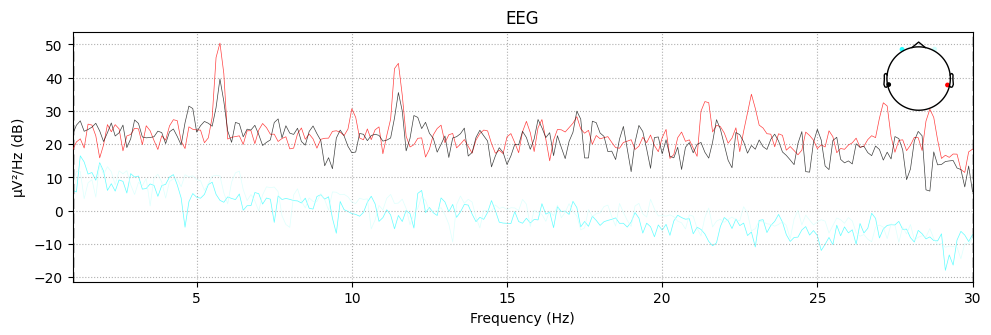

In [5]:
# ------------------------ Initial Test

type = "vibro"
duration = 20
file_name_raw = "C:\\Users\\matil\\Desktop\\FYP\\code_env\\eeg-notebooks\\FYP\\data\\test\\data_muse_raw.csv"
file_name_marked = "C:\\Users\\matil\\Desktop\\FYP\\code_env\\eeg-notebooks\\FYP\\data\\test\\data_muse_marked.csv"
file_name_synched ="C:\\Users\\matil\\Desktop\\FYP\\code_env\\eeg-notebooks\\FYP\\data\\test\\data_muse_synch.csv"

experiment_lib.run_trial(type, duration, file_name_raw = file_name_raw, file_name_marked = file_name_marked, file_name_synched =file_name_synched)

raw = data.load_csv_as_raw([file_name_raw ],256, [1,2,3, 4])
raw.filter(1,30, method='iir')
raw.plot_psd(fmin=1, fmax=30)

In [6]:
# -----------------------------TRIAL 1

type = "VibroVisual"

session_n = "1"

data_path = os.path.join(os.path.expanduser('~/'),'Desktop', 'FYP', 'code_env', 'eeg-notebooks','FYP', 'data', type, subject_id, session_n)
file_name_raw = os.path.join(data_path, 'eeg.csv')
file_name_marked = os.path.join(data_path, 'markers.csv')
file_name_synched = os.path.join(data_path, 'synched_data.csv')


experiment_lib.run_trial(type = "vibro", duration = record_duration, file_name_raw = file_name_raw, file_name_marked = file_name_marked, file_name_synched = file_name_synched)



Experiment Started at time  1693991373.3546793
Looking for an EEG stream...
Start writing data at time  1693991373.356689
Start acquiring data at time  1693991373.858274
Vibrate  left
left
arrow
Vibrate  left
left
arrow
Vibrate  right
left
arrow
Vibrate  left
left
arrow
Vibrate  right
right
arrow
Vibrate  left
left
arrow
Vibrate  right
right
arrow
Vibrate  right
right
arrow
Vibrate  left
left
arrow
Vibrate  right
right
arrow
Vibrate  left
left
arrow
Vibrate  left
left
arrow
Vibrate  right
right
arrow
Vibrate  left
Vibrate  right
right
arrow
Vibrate  right
right
arrow
Vibrate  left
left
arrow
Vibrate  left
left
arrow
Vibrate  right
right
arrow
Vibrate  left
left
arrow
Vibrate  right
right
arrow
Vibrate  left
left
arrow
Vibrate  left
left
arrow
Vibrate  left
left
arrow
Vibrate  right
right
arrow
Vibrate  right
right
arrow
Vibrate  left
left
arrow
Vibrate  right
right
arrow
Vibrate  right
right
arrow
Vibrate  right
right
arrow
Vibrate  left
left
arrow
Vibrate  left
right
arrow
Vibrate  le

In [7]:
# -----------------------------TRIAL 2

type = "VibroVisual"

session_n = "2"

data_path = os.path.join(os.path.expanduser('~/'),'Desktop', 'FYP', 'code_env', 'eeg-notebooks','FYP', 'data', type, subject_id, session_n)
file_name_raw = os.path.join(data_path, 'eeg.csv')
file_name_marked = os.path.join(data_path, 'markers.csv')
file_name_synched = os.path.join(data_path, 'synched_data.csv')


experiment_lib.run_trial(type = "vibro", duration = record_duration, file_name_raw = file_name_raw, file_name_marked = file_name_marked, file_name_synched = file_name_synched)


Experiment Started at time  1693991888.508075
Looking for an EEG stream...
Start writing data at time  1693991888.5100803
Start acquiring data at time  1693991889.0129802
Vibrate  left
left
arrow
Vibrate  left
left
arrow
Vibrate  left
left
arrow
Vibrate  right
left
arrow
Vibrate  left
left
arrow
Vibrate  left
left
arrow
Vibrate  right
right
arrow
Vibrate  right
right
arrow
Vibrate  right
right
arrow
Vibrate  left
left
arrow
Vibrate  right
right
arrow
Vibrate  right
right
arrow
Vibrate  right
right
arrow
Vibrate  right
right
arrow
Vibrate  left
left
arrow
Vibrate  right
right
arrow
Vibrate  left
left
arrow
Vibrate  left
left
arrow
Vibrate  left
right
arrow
Vibrate  left
left
arrow
Vibrate  left
left
arrow
Vibrate  right
right
arrow
Vibrate  left
left
arrow
Vibrate  left
left
arrow
Vibrate  right
right
arrow
Vibrate  right
right
arrow
Vibrate  right
right
arrow
Vibrate  left
left
arrow
Vibrate  left
left
arrow
Vibrate  left
left
arrow
Vibrate  right
right
arrow
Vibrate  left
left
arrow
V

------------
*SHAPE EXPERIMENT*
---------------

In [ ]:
# ----------------------- CHECK EEG 

# COMMAND: muselsl view --version 2

data.check_quality()

In [5]:
# ------------------------ Initial Test

type = "shape"
duration = 20
file_name_raw = "C:\\Users\\matil\\Desktop\\FYP\\code_env\\eeg-notebooks\\FYP\\data\\test\\data_muse_raw.csv"
file_name_marked = "C:\\Users\\matil\\Desktop\\FYP\\code_env\\eeg-notebooks\\FYP\\data\\test\\data_muse_marked.csv"
file_name_synched ="C:\\Users\\matil\\Desktop\\FYP\\code_env\\eeg-notebooks\\FYP\\data\\test\\data_muse_synch.csv"

experiment_lib.run_trial(type, duration, file_name_raw = file_name_raw, file_name_marked = file_name_marked, file_name_synched =file_name_synched)

raw = data.load_csv_as_raw([file_name_raw ],256, [1,2,3, 4])
raw.filter(1,30, method='iir')
raw.plot_psd(fmin=1, fmax=30)

Experiment Started at time  1693993927.9001093
Looking for an EEG stream...
Start writing data at time  1693993927.9021096
Start acquiring data at time  1693993928.4068968
Move  left
left
arrow
Move  left
left
arrow
Stopped writing data at time  1693993948.6811805
Stopped acquiring data at time  1693993953.4096684
Number of blue circles reported is:  3 Number of actual blue circles is:  2
Experiment Completed at time  1693993958.6518114
386.0993 	WARNING 	User requested fullscreen with size [1600  900], but screen is actually [1536, 864]. Using actual size


KeyboardInterrupt: 

In [6]:
# -----------------------------TRIAL 1

type = "ShapeVisual"

session_n = "1"

data_path = os.path.join(os.path.expanduser('~/'),'Desktop', 'FYP', 'code_env', 'eeg-notebooks','FYP', 'data', type, subject_id, session_n)

file_name_raw = os.path.join(data_path, 'eeg.csv')
file_name_marked = os.path.join(data_path, 'markers.csv')
file_name_synched = os.path.join(data_path, 'synched_data.csv')

experiment_lib.run_trial(type = "shape", duration = record_duration, file_name_raw = file_name_raw, file_name_marked = file_name_marked, file_name_synched = file_name_synched)
#03 - 66
#todo synch part 03

Experiment Started at time  1693993994.183192
Looking for an EEG stream...
Start writing data at time  1693993994.1867108
Start acquiring data at time  1693993994.6896198
Move  left
left
arrow
Move  left
left
arrow
Move  right
right
arrow
Move  left
left
arrow
Move  left
left
arrow
Move  right
right
arrow
Move  left
left
arrow
Move  right
right
arrow
Move  right
right
arrow
Move  left
left
arrow
right
arrow
Move  right
right
arrow
Move  left
left
arrow
Move  left
left
arrow
Move  left
left
arrow
Move  left
left
arrow
Move  right
right
arrow
Move  right
right
arrow
Move  left
left
arrow
Move  left
left
arrow
Move  left
left
arrow
Move  left
left
arrow
Move  right
right
arrow
Move  left
left
arrow
Move  right
right
arrow
Move  left
left
arrow
Move  left
left
arrow
Move  right
right
arrow
Move  left
left
arrow
Move  right
right
arrow
Move  right
right
arrow
Move  right
right
arrow
Move  right
right
arrow
Move  left
left
arrow
Move  right
right
arrow
Move  right
right
arrow
Move  right
rig

KeyboardInterrupt: 

In [7]:
# -----------------------------TRIAL 2

type = "ShapeVisual"

session_n = "2"

data_path = os.path.join(os.path.expanduser('~/'),'Desktop', 'FYP', 'code_env', 'eeg-notebooks','FYP', 'data', type, subject_id, session_n)

file_name_raw = os.path.join(data_path, 'eeg.csv')
file_name_marked = os.path.join(data_path, 'markers.csv')
file_name_synched = os.path.join(data_path, 'synched_data.csv')

experiment_lib.run_trial(type = "shape", duration = record_duration, file_name_raw = file_name_raw, file_name_marked = file_name_marked, file_name_synched = file_name_synched)


Experiment Started at time  1693994524.1635303
Looking for an EEG stream...
Start writing data at time  1693994524.1881359
Start acquiring data at time  1693994524.714168
Move  left
left
arrow
Move  left
left
arrow
Move  left
left
arrow
Move  left
left
arrow
Move  right
right
arrow
Move  right
right
arrow
Move  left
left
arrow
Move  right
right
arrow
Move  left
left
arrow
Move  left
left
arrow
Move  right
right
arrow
Move  right
Move  right
right
arrow
Move  left
left
arrow
Move  right
right
arrow
Move  right
right
arrow
Move  left
left
arrow
Move  right
right
arrow
Move  left
left
arrow
Move  right
left
arrow
Move  left
left
arrow
Move  left
left
arrow
Move  left
left
arrow
Move  right
left
arrow
Move  left
left
arrow
Move  left
left
arrow
Move  right
right
arrow
Move  left
left
arrow
Move  right
right
arrow
Move  left
left
arrow
Move  right
right
arrow
Move  right
right
arrow
Move  left
left
arrow
Move  right
right
arrow
Move  right
right
arrow
Move  left
left
arrow
Move  right
right